# CS110 Final Project - The Shortest Journey

$$Alexander \ Bricken$$
$$Minerva \ Schools \ at \ KGI$$

## Abstract

Finding the shortest journey is a problem that arises in a variety of fields, from logistics network optimisation, to distance-vector routing protocols, to GPS systems. Fortunately, algorithms have been designed to handle such situations. By thinking about points in a network as sources and destinations, we can represent this shortest journey problem as a graph. Specifically, in this paper we solve the shortest jounrey problem by implementing solutions such as Dijkstra's algorithm, the Bellman-Ford algorithm, and Johnson's algorithm. As a result of this research, we gather that each algorithm has its merits and downfalls, and they should hence be applied accordingly in order to maximise efficiency in the real world.

---

## Introduction

With the rise of containerisation, global positioning systems (GPS), and complex supply chain networks, the ability to find the shortest path (or distance) between a single position and all other positions has become highly relevant (Wahyuni, 2010). The better an algorithm is at finding the shortest path, the less time it takes for goods to be shipped and for people to travel. Hence, with a world that is ever-seeking to optimise processes, lower costs, and increase efficiency, supply chain optimisation is pertinent and one such way for it to be accomplished finding the shortest distance from point A to B, or even from point A to all other points of consideration.

In this paper, as a relatable example, we focus in particular on the supply chain logistics for transportation over road networks. For example, if a truck driver were to pick up goods at a manufacturing plant, how would he or she get to the desired port (the destination) in the shortest distance/time possible? We will draw on this example to better explain the shortest distance algorithms implemented. 

Specifically, we will be examining the use of greedy algorithms in finding the shortest path from a source to all other nodes in a network/graph data structure by using adjacency lists. As explored in the next section, a greedy algorithm always makes the choice that looks best at the moment. In other words, "it makes a locally optimal choice in the hope that this choice will lead to a globally optimal solution." (Cormen et al., 2009). The greedy algorithms we will be implementing include Dijkstra's algorithm, which uses a minimum priority queue to optimize computational efficiency, and the Bellman-Ford Algorithm, which uses a graph data structure and allows for negative edge weights. As a result of the proposed variation (Bellman Ford being able to handle negative edges but Dijkstra's being computationally faster), we will also be exploring Johnson's algorithm as a way of translating negative into positive edge weights for reliable use of Dijkstra's algorithm for optimised computational calculations.

In the following sections of this paper, we will: *(i)* Explore the use of greedy and dynamic programming algorithms in solving the shortest distance problem; *(ii)* Describe and analyse Dijkstra's algorithm; *(iii)* Describe and analyse the Bellman-Ford algorithm ; *(iv)* Discuss and analyse Johnson's algorithm; and *(v)* Perform theoretical and computational analysis on all three algorithms, referencing the computational analysis performed in Code Appendix F to compare and contrast.

---

## The Greedy Approach

As mentioned above, a greedy algorithm is one which makes a greedy choice. That is, in an immediate moment it makes the decision that generates the highest returns with respect to the solution, regardless of future potential outcomes. This is important for specific problems, like finding the shortest path from one node to all other nodes, because regardless of the potential outcomes of future decisions, the one at hand will always be best for optimisation. 

If we take the greedy choice, it can also be very computationally efficient. This is because whenever we make a decision, it removes subproblems outside of the ones that contain that decision. To better explain this, we can think about our road network example. If we go from point A to point B, because this is the most greedy choice, then all subproblem solutions after that point must include that initial decision from A to B. We therefore only have one remaining subproblem to solve: finding the optimal route after our A to B traversal finishes. Hence, we can deduce that the shortest journey problem is one that is tailored for a greedy approach. The nature of this subproblem structure is described in the following section.


### Greedy Theory

In order to design a greedy algorithm that is the best solution to the problem, it is evident that the problem must exhibit particular features. Such features include being an optimization problem where we make a choice and are left with one subproblem to solve (as suggested above), and that there is always an optimal solution to the original problem that makes the greedy choice. Both of these things, we realise, could also be charactersitics of a problem that can be solved using dynamic programming.

We know a problem that can be solved using dynamic programming should have two components (Cormen et al., 2009):

1. **Optimal substructure:**
This means that when you break down your problem into smaller units, those smaller units also need to be broken down into yet smaller units for an optimal solution. 

2. **Overlapping subproblems:**
This means that while solving for the solution, the subproblems you formulate get repeated, and hence need only be solved once.

By thinking about these features, we can compare a dynamic programming solution with a greedy solution. A greedy solution exhibits two properties as well. One of them being the same as dynamic programming (optimal substructure):

1. **Greedy-choice property:**
In relation to the point made at the beginning of this section, we can assemble a globally optimal solution by making locally optimal (greedy) choices. In other words, we make the choice that looks best in the current problem, without considering results from subproblems (other potential outcomes).

2. **Optimal substructure:**
As suggested above, this means the an optimal solution to the problem contains within it optimal solutions to subproblems. This is important for greedy algorithms as we can argue that an optimal solution to the subproblem, combined with the greedy choice already made, yields an optimal solution to the original problem. This scheme implicitly uses induction on the subproblems to prove that making the greedy choice at every step produces an optimal solution.

The greedy-choice property versus the overlapping subproblem is where the difference between the greedy approach and dynamic programming lies. While a dynamic programming solution could provide the best solution for an algorithm that uses a greedy approach, it would be much more computationally expensive in terms of space (as memoization is required) and time (as more subproblems must be solved). Therefore, for particular problems like Dijkstra's algorithm, a greedy solution is optimal. 

It is worth noting that the Bellman-Ford algorithm and Dijkstra's algorithm can be considered both greedy and dynamic (Sniedovich, 2006). They exhibit a greedy choice property, due to the fact that the locally optimal choices made lead to a globally optimal solution; they exhibit overlapping subproblems as the subproblems are to find the shortest path from each node A to B that uses fewer edges than previosuly discovered, and if such a path exists, to update accordingly; and optimal substructure, by having the global solution to the problem contain within it optimal solutions to (local) subproblems. The details of this will be discussed below. However, do note that not all deemed "greedy algorithms" are also dynamic in nature (like the fractional knapsack problem) (Yarovoi, 2018).

---

## Dijkstra's Algorithm

While we were able to outline the functionality of Djikstra's algorithm above, we will go more in-depth in this section. The main resource for this analysis will be Cormen et al. (2009), the textbook used for this course and that which is deemed to be the *gold standard* for algorithmic understanding.

For the implementation of Dijkstra's algorithm, please see Code Appendix A, B, and C, as well as F for computational analysis.

### Overview

Dijkstra's algorithm solves the shortest path problem by using an origin node and finding the shortest path to all other nodes in a given graph. Specifically, Dijkstra's algorithm is for weighted undirected graphs that are non-negative (no negative edge weights).

In this implementation of Dijkstra's algorithm, we use a minimum heap for storing the aspects of the graph before finding the shortest distances. A minimum heap is used in this case because it is minimally computationally expensive way to implement a priority queue to get the minimum distance vertex from set of not yet included vertices. Certain operations are perfect for this application, such as heappop, heappush, and heapify.

The following is an outline for how Dijkstra's algorithm has been implemented in this paper to calculate the shortest paths from the origin node to all other nodes. Prior to this implementation, an adjacency list has been inserted as objects (vertices with edge weights) of a class (Graph).

1. A source (origin) node is identified and input. This is the node all distances using weights will be calculated from.
2. A list `dist_lst` is created. This is for storing previously calculated distances and updating them as relaxation occurs to find the minimum distance for each path. In a dynamic programming sense, this can be considered similar to memoization.
3. Vertices are added to a min heap, all initially having distance values of infinity (using the heapq library).
4. The source vertex is set to 0 distance away (to initialise the heap).
5. The min heap is used to store unfinalised distances. By using a while loop, vertices are extracted and the shortest distance is found by relaxing edges.
6. The shortest distances, once found, are stored in `dist_lst`.
7. `dist_lst` is output along with the source node and the number of vertices used.

### Greedy and Dynamic Programming

The Dijkstra's algorithm implemented in this paper is an iterative greedy algorithm. This is demonstrated because it always chooses the "lightest" or "closest" vertex (in terms of weight, or distance, respectively). In a way, this can be thought about as a decision tree, whereby binary decisions are made between lower and higher weights, developing the expected value for choosing a certain path over others. As the greedy algorithm progresses, the value of the decisions it makes for getting from point A to B become clear, and therefore determines the optimal route. It satisfies the greedy-choice property by allowing for a globally optimal solution to be satisfied by making locally optimal solutions, choosing the lowest weight path in every situation and using the relaxing of edges to discover potentially missed paths (to move from a local minimum to a global minimum). As well as this, the shortest path problem being considered (and thus our implementation) takes advantage of optimal substructure, whereby an optimal solution to the subproblem, combined with the greedy choice already made, yields an optimal solution to the original problem.

While Dijkstra's does not completely satisfy being a dynamic programming algorithm as much as it does a greedy, certain aspects are definitely evident. Depending on how we define a dynamic program, we could include it or not. Our implementation of Dijkstra's solves the shortest path problem in a top-down manner, reducing each given problem instance to a smaller one through use of memoization (by using and referencing the permanent list `dist_lst`). This is unline most dynamic programming solutions which work bottom-up, taking advantage of the overlapping subproblems. However, besides this difference (which is not make-or-break in terms of defining the algorithm), Dijkstra's shares many features with other dynamic programming algorithms. Specifically, it demonstrates optimal substructure (as mentioned above), and overlapping subproblems whereby the solution for solving the shortest path can be reused across the problem. As mentioned in Wikipedia-a (2019), "from a dynamic programming point of view, Dijkstra's algorithm is a successive approximation scheme that solves the dynamic programming functional equation for the shortest path problem by the Reaching method." While the specifics of the Reaching method are outside of the scope of this paper, essentially it is to do with "Bellman's famous Principle of Optimality", especially in the context of the shortest path problem. This Principle is one of dynamic programming and hence if Dijkstra's is derived from it, then we can certainly think of the algorithm in a dynamic programming sense as well as a greedy sense.

### Relaxing of Edges (Relaxation)

The best way to think about Dijkstra's algorithm finding the optimal (shortest) paths, is by considering the fact that initially no path is known. As the algorithm progresses, it divides the nodes into two subset groups: a temporary group (the min heap) and a permanent group (the `dist_list`). Every node in the min heap is eventually popped and the shortest distance to that node is eventually found by relaxing edges. Relaxing edges is essentially a way to try to lower the cost of getting to a vertex by using another vertex. For example, it is whether the current path from A to B could be improved by diverting through C (hence going from A to C and C to B). Dijkstra's algorithm relaxes each edge exactly once (Cormen et al., 2009). As we will see, however, other shortest path algorithms can use edge relaxing multiple times on one edge (like the Bellman-Ford algorithm).


### Visualising Dijkstra's Algorithm

We can visalise the networks that we are using Dijkstra's algorithm on by using the graphicResult method from Code Appendix B. This uses the networkx library to create a network diagram with weights between respective edges.

![](images/graph1.png)

**Figure 1.** The graph generated in Code Appendix C to demonstrate a network diagram with weighted edges.

However, a better visual for understanding the process can be found [here](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm#/media/File:Dijkstra_Animation.gif) (Wikipedia, 2019).

---

## Bellman-Ford Algorithm

As we did with Dijkstra's algorithm, we will also analyse the Bellman-Ford algorithm.

For the implementation of Dijkstra's algorithm, please see Code Appendix A, B, and D, as well as F for computational analysis.

### Overview

While the Bellman-Ford algorithm is like Dijkstra's algorithm in the sense of finding the shortest path between a source node and all other nodes, at least for this implementation, it is different because it can operate on graphs with negative edge weights and can detect negative edge weight cycles. This is when a cycle created by the paths of a graph has a negative sum, leaving the potential for relaxing edges indefinitely.

The following is an outline for how the Bellman-Ford algorithm has been implemented in this paper to calculate the shortest paths from the origin node to all other nodes. Prior to this implementation, an adjacency list has been inserted as objects (vertices with edge weights) of a class (Graph).

1. A list, termed `dist_lst` is generated and filled with infinity values, the length of the number of vertices in the graph.
2. The distance to the source is set to 0. 
3. The shortest distances are calculated by relaxing all edges $|V| - 1$ times (as this is the maximum amount of possible edges there are from one vertex to another. The results are stored in `dist_lst`.
4. Negative edge weight cycles are checked for by examining if there is an even shorter path than that found in step 3. This should be impossible, unless there is a negative cycle. If there is one, the algorithm returns False.
5. `dist_lst` is output along with the source node and the number of vertices used.


### Greedy and Dynamic Programming

The Bellman-Ford algorithm is greedy, like Dijkstra's, as it satisfies both the greedy-choice property and the optimal substructure in the same way.

We can think of the Bellman-Ford algorithm in terms of dynamic programming by defining the overlapping subproblems: finding the shortest path from A to B that uses the previously found or fewer edge weight. This demonstrates the repetitive process of solving the same problem over and over again until an optimal solution is found. Similarly, optimal substructure is shown as highlighted above with in Dijkstra's algorithm. The Bellman-Ford algorithm, unlike Dijkstra's, calculates the shortest paths in a bottom-up manner, calculating the shortest distances which have (at-most) one edge in the path, and then two, henceforth.

It is worth noting here that when we consider greedy algorithms and dynamic programming, we are not mutually exclusive in our definition. Some algorithms like the Bellman-Ford and Dijkstra's, as realised, can be both. However, as both the greedy and dynamic-programming strategies exploit optimal sub-structure, "you may be tempted to generate a dynamic-programming solution to a problem when a greedy solution suffices or, conversely, you might mistakenly think that a greedy solution works when in fact a dynamic-programming solution is required." (Cormen et al., 2009). 

### Relaxing of Edges

Aside from encountering a negative edge weight cycle, the Bellman-Ford algorithm propagates correct distance estimates to all nodes in a graph in V-1 steps, where V is the number of vertices. Similar to Dijkstra's algorithm, the Bellman-Ford algorithm uses relaxation (relaxing of edges) to lower the cost of getting to a vertex by using another vertex as well. The only difference, however, is that the Bellman Ford algorithm relaxes all edges $|V| - 1$ times.

### Visualising The Bellman-Ford Algorithm

![](images/graph2.png)

**Figure 2.** A figure taken from Cormen et al. (2009). This shows the execution of the the Bellman Ford algorithm in steps. The source is vertex s.

---

## Johnson's Algorithm

When we consider the Bellman-Ford and Dijkstra's algorithms, we realise that Dijkstra's should be more theoretically efficient (see analysis below), but not as convenient due to the fact it cannot deal with negative edge weights, nor detect a negative weight cycle. As well as this, the Bellman-Ford works better than Dijkstra’s for distributed systems due to edges being considered one-by-one and no minimum value of all vertices being required (GeeksforGeeks-b, 2019).

Therefore, we should try to gather the best of both algorithms: the higher computational efficiency from Djikstra's, and the ability to deal with negative edge weights from the Bellman-Ford. This is the use of Johnson's algorithm (see implementation in Code Appendix E).

Johnson's algorithm is a way to use "the Bellman–Ford algorithm to compute a transformation of the input graph that removes all negative weights", which allows  "Dijkstra's algorithm to be used on the transformed graph." (Wikipedia-b, 2019).

Because both Dijkstra's and the Bellman-Ford algorithm are used in the implementation of Johnson's algorithm, Johnson's is host to the same data structure use and a combination of unique features (e.g. both dynamic programming and greedy choice).

### Overview

The overview of this paper's implementation of Johnson's Algorithm is as follows:

1. Find the minimum weighted edge (including negatives) of the graph being examined.
2. Add the absolute value of that weight to all weights (including itself) in the graph. This makes all weights positive.
3. Convert the Bellman-Ford implemented graph (which now has all positive weights) into a Dijkstra graph for calculation of the shortest distances between vertices.

### Visualising Johnson's Algorithm

![](images/graph3.png)

**Figure 3.** A graphical representation of Johnson's algorithm working to combine the Bellman-Ford algorithm and Dijkstra's algorithm (once reweighted).

---

## Djikstra's vs. Bellman-Ford vs. Johnson's

### Theoretical Analysis

In this section, we consider the theoretical complexities in terms of time and space for the algorithms above. It is important to consider the complexities of these algorithms in relation to each other so then we can compare their efficiency to other useful aspects (such as Bellman-Ford being able to deal with negative edge weights), and eventually understand their potential applicability to the real world and the type of scalable impact they can have.

#### Dijkstra's Algorithm

Dijkstra's maintains the minimum heap properties and utilises operations such as heapify(), heappush(), and heappop(). Pushing and popping only take $O(1)$ due to the fact that only the top value of the heap must be operated on, whereas heapifying takes $O(log V)$, where V is the number of vertices. This is because a heapify works across the levels of the min binary heap. Thus, we know that the operations performed on the minimum binary heap equal $O(log V)$.

 When we consider the other computation necessary for Dijkstra's algorithm, we realise that within the inner loop, we execute our relaxation $O(V+E)$ times, where E is the number of edges (as we only check an edge once, unlike for Bellman-Ford). Therefore, we can calculate our time complexity as $O(log V)*O(E+V) = O((E+V)*LogV) = O(ELogV)$.

This implementation uses a minimum binary heap, demonstrating O(n) space efficiency plus lower order terms for the adjacency list. It is worth noting that the algorithm could be improved further in terms of time complexity if a Fibonacci Heap were implemented. This would take $O(1)$ time for decrease-key operation while our Binary Heap takes $O(log V)$ time.

However, with an adjacency matrix (instead of list) implementation of Dijkstra's algorithm, we would have an $O(V^2)$ aysmptotic time complexity.

#### Bellman-Ford Algorithm

We know that the initialisation of the graph takes $O(V)$ time and space. We also know, as discussed above, that we relax $|V| - 1$ times, suggesting $O(E(V-1)) = O(VE)$ time. 

Hence, provided the negative cycle is a single check through our edges as $O(E)$, we can concur that the overall runtime of the Bellman-Ford algorithm is $2*O(VE) = O(VE)$, if we delete lower order terms and ignore the constants.

#### Johnson's Algorithm

As we know that the computational complexity of Dijkstra's algorithm is $O(ELogV)$ and the Bellman-Ford is $O(VE)$, we can think about Johnson's algorithm as the intersection of these.

The first step for initialisation, like Bellman-Ford and Dijkstra's, is equal to $O(V)$. This is because it needs to make a new edge to all vertices in the graph. The Bellman-Ford then runs in $O(VE)$ time and the conversion of edge weights costs $O(E)$, as we need to iterate through all edges to find the minimum and add to all of them the absolute value of the lowest weight.

Finally, Dijkstra's algorithm using the minimum heaps takes $O(log V)$ time. Thus, we can confirm that the total computational complexity of Johnson's algorithm is $O(VE)$ multiplied by $O(log V) = O(VE log(V))$

#### Summary

$$Dijkstra's  =  O(E log V)$$
$$Bellman-Ford  =  O(VE)$$
$$Johnson's  =  O(VE log(V))$$


### Computational Complexity Analysis

![](images/graph4.png)

**Figure 4.** A line plot to show the varying time taken to find the shortest distances from a source node to all other nodes in increasing graph sizes (as defined by a higher number of vertices). See legend for label of each line.

We see in the plot above the computational analysis from Code Appendix F. We created this plot by taking the average time taken to find the shortest distances in graphs using all three algorithms over a varying size of graph (V ranging from 3 to 400). 

Computational complexity analysis, as well as theoretical analysis, is important for considering the speed and scalability of our algorithmic implementation. At first glance, we can see that the Bellman-Ford algorithm is asympotically exponential, corresponding to the theoretical complexity calculated above ($O(VE)$). We can also consider Dijkstra's and Johnson's algorithms, the red and yellow lines. They are quite similar in shape and trend, following the same asympototic nature. This does not completely correspond with our theoretical analysis because we would assume Johnson's would be less efficient than Dijkstra's ($O(VE log(V))$ vs. $O(E log V)$, respectively).

Johnson's algorithm being more computationally efficient than expected (or Dijkstra's being less computationally efficient than expected) could be explained by not evaluating graphs of over 400 nodes, thereby restricting our capacity for higher level analysis. It could also be explained by the way we generate our random lists to be inputted into the algorithms every iteration of our function. Perhaps the random lists work in favour of Johnson's algorithm more. Finally, it could be explained by a poor implementation of Johnson's algorithm, as a graph in Code Appendix E for the Bellman-Ford portion of Johnson's algorithm is not constructed before recalculating the weights, meaning a negative weight cycle test is not undertaken and hence Johnson's algorithm is faster than usual (probably the most likely of the above). While I am unable to implement this improved Johnson's algorithm within the scope of this paper, it would be important to check this as an extension of this paper for the computational implications to be confirmed with respect to the theory. This is a disadvantage of my implementation, however, that does not prevent us from gathering a holistic understanding of the algorithms analysed in this paper and the central claims made.

## Conclusion

As we have gathered from this paper, the different "shortest journey" algorithms all have their advantages and disadvantages. For example, Dijkstra's algorithm is computationally efficient when using minimum heaps and adjacency lists (and could be made even more if Fibonacci heaps are used); however, it cannot account for negative edges, an advantage of the Bellman-Ford algorithm. If we are to bring these ideas together though, then combined with solutions such as Johnson's algorithm, one can make a general solution that may lose a slight amount of computational efficiency, but gain more flexibility in application. At the end of the day, the tradeoffs between these algorithms are there for a reason - each has a real world application which it is more tailored to. While Dijkstra's algorithm may be the best for logistics network optimisation (as no edges can have negative weights), the Bellman-Ford can be used for distance-vector routing protocols, where packet routes are chosen for a network.

---

## References

Cormen et al. (2009). Introduction to Algorithms: Third Edition. The MIT Press.

GeeksforGeeks-a. (2019). Dijkstra’s Algorithm for Adjacency List Representation | Greedy Algo-8. Retrieved from https://www.geeksforgeeks.org/dijkstras-algorithm-for-adjacency-list-representation-greedy-algo-8/

GeeksforGeeks-b. (2019). Bellman–Ford Algorithm | DP-23. Retrieved from https://www.geeksforgeeks.org/bellman-ford-algorithm-dp-23/

Sniedovich, Moshe. (2019). Dijkstra’s algorithm revisited: the dynamic programming connexion. Retrieved from http://matwbn.icm.edu.pl/ksiazki/cc/cc35/cc3536.pdf

Wahyuni, Dina. (2010). The Importance of Supply Chain Management in Competitive Business: A Case Study on Woolworths. Retrieved from https://www.researchgate.net/publication/228215291_The_Importance_of_Supply_Chain_Management_in_Competitive_Business_A_Case_Study_on_Woolworths

Wikipedia-a. (2019). Dijkstra's algorithm. Retrieved from https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm#Using_a_priority_queue

Wikipedia-b. (2019). Johnson's algorithm. Retrieved from https://en.wikipedia.org/wiki/Johnson%27s_algorithm

Yarovoi, Eugene. (2018). Does a fractional knapsack problem follow a dynamic algorithm? Retrieved from https://www.quora.com/Does-a-fractional-knapsack-problem-follow-a-dynamic-algorithm


---

## Appendix

### HC Appendix

**#decisiontrees:** I considered the complex decision-making my algorithm undertakes as it optimises the route using the respective weights and relaxation to reach the shortest path. Specifically when writing about Dijkstra's algorithm (and as an extension, all other algorithms), I considered the implications of the algorithm choosing one path or the other, especially if they were of equal weight. In this way, I programmed the algorithm to consider the value of each decision or edge it included in its calculations, thereby choosing the global minimum (a representation of the shortest path).

**#breakitdown:** By breaking the problem of finding the shortest path distance into feasible steps, especially through consideration of overlapping subproblems and optimal substructure, I was able to better understand the algorithms I was implementing. Through this decomposition, dynamic programming and greedy choice problem-solving was far easier to implement. When doing my computational analysis, I also broke the components of the algorithms down into parts for theoretical analysis.

**#networks:** I used the networkx library to visualise my graphs, which consisted of nodes (vertices) and edges. The network/graph structure was pertinent in my application of the algorithms. I tried to consider the implications of certain functions on my network, like relaxing edges, and continued relating the use of my algorithms for finding the shortest distances in real world networks, such as road networks.

**#optimisation:** By considering the shortest path possible, we are essentially considering an optimisation problem. I solved this optimisation problem by use of Dijkstra’s, the Bellman-Ford, and Johnson's algorithms. I also considered the advantages and disadvantages of each algorithm at finding the local and global optima, especially in relation to relaxing edges.

### LO Appendix

**#greedyalgorithms:** I consistently made sure to consider the importance of a greedy choice approach and what defines a greedy algorithm throughout my paper. For example, in each of my explanations of for Dijkstra's and the Bellman-Ford algorithm, I included a section speaking about the application of my greedy algorithms. As well as this, I included a section at the beginning of the paper where the importance of greedy algorithms in solving this problem was discussed with a real world example. I tried to relate my use of greedy algorithms to dynamic programming application as well.

**#dynamicprogramming:** I applied dynamic programming technique throughout my Python implementations of my algorithms, using aspects of memoization and consideration of overlapping subproblems and optimal substructure. I also made sure to talk about these aspects of dynamic programming and how they relate to my algorithms. I was concious about the varying opinions towards greedy/dynamic approaches and the overlap between them, and therefore tried to highlight this in my analysis of each of my algorithms.

**#complexityanalysis:** In the computational analysis section, I broke down the algorithms into parts that made sense in terms of complexity analysis. By doing so, I could combine the complexity analyses for each part together to better understand the algorithms as a whole. I attempted to use appropriate notation, analysing the algorithms at their asymptotic upper bounds by using Big-O. I also tried to justify my consideration of complexity at the beginning of the section and in my conclusion by relating complexity back to the real world applicability of algorithms.

**#datastructures:** I used a min heap data structure implemented through the heapq library and I used a graph data structure designed by a class for me to represent the sources, destinations, edges, and other network-like features surrounding the problem. I tried to consider the power of my adjacency list implementation versus an adjacency matrix and mentioned that a Fibonacci heap would be better computationally than my min heap. I tried to justify my use of the min heap in Dijkstra's in the respective section as well.

**#pythonprogramming:** I efficiently and accurately implemented functional algorithms as seen in the Code Appendix. I attempted using libraries to supplement my code where needed, and demonstrated use of object-oriented programming by using a Graph class. I also implemented a computational analysis test and test cases for each of my algorithms. We can see that the output of my Dijkstra's and Bellman-Ford algorithms for manual implementation are the same, suggesting they both operate properly. I also used advanced matplotlib, networkx and Python printing tools to accurately output my graphs, figures, and output from functions.

**#computationalcritique:** By implementing these different algorithms, I was able to critique their advantages and disadvantages and come up with a critiqued solution to the shortest journey problem - the fact that no algorithm is best for everything! I tried to bring these trade-offs into real world application and, especially in my conclusion, I made sure to justify my claims with the evidence gathered from my computational analysis.



### Code Appendix

In [1]:
# import necessary libraries
import heapq
from collections import defaultdict
import random as rd
import time
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

#### A) Graph Class For All Algorithms

In [2]:
infinity = float('inf')

class Graph():
    
    def __init__(self, vertex):
        '''
        Initialising the Graph class
        We use the defaultdict datastructure as a way
        of creating items (key:value pairs) that are called on
        but don't exist in the dictionary yet.
        '''
        self.v = vertex
        self.dijkstra_graph = defaultdict(list)
        self.bellman_graph = []
        
    def djikstra_insert_path(self, source, destination, weight):
        '''
        Adds an edge from a source node (node A)
        to a destination node (node B). This is done using
        an adjacency list.
        '''
        
        # initialising new node with weight
        new = [destination, weight]
        self.dijkstra_graph[source].insert(0, new)
        
        # initialising node in other way
        new = [source, weight] 
        self.dijkstra_graph[destination].insert(0, new)
        
    # function to add an edge to graph 
    def bellman_insert_path(self, source, destination, weight): 
        self.bellman_graph.append([source, destination, weight]) 

#### B) Graphical Output Methods

In [3]:
# a way to print the results of the adjacency list shortest distance calculations
# in a graphic way
def printResult(V, dist_lst, source):
    node_num = [i for i in range(V)]

    print('Source  -->  Destination  |  Shortest Distance ')
    print('-----------------------------------------------')
    for i in range(len(dist_lst)):
        print(f'   {source}    -->      {node_num[i]}        |         {dist_lst[i]}')
        print('-----------------------------------------------')

Graph.printResult = printResult

In [4]:
# a way to output an adjacency list as a graph with weights using the networkx library
def graphicResult(graph_list):
    rd.seed(990)
    plt.figure(figsize=(10,10))
    G = nx.Graph()
    G.add_weighted_edges_from(graph_list)
    #G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.DiGraph)
    layout = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels, alpha=0.6)
    nx.draw(G, layout, alpha=0.5)
    plt.show()

#### C) Dijkstra's Implementation (GeeksforGeeks-a, 2019) (Cormen et al. 2009)

In [5]:
# O(ELogV) function 
def dijkstras(self, source):
    '''
    A greedy algorithm for finding the shortest path from one node to all other nodes.
    It cannot use negative edges in all cases.
    It uses a min heap data structure.
    Uses relaxing of edges.
    '''

    V = self.v # get number of vertices in graph
    dist_lst = []

    # create minheap
    minHeap = []

    # add vertices
    for i in range(V):
        dist_lst.append(infinity)
        heapq.heappush(minHeap, [i, dist_lst[i]])

    # turn dist value of src to 0
    minHeap[source] = [source, 0]
    dist_lst[source] = 0
    # and send to top of min heap
    heapq.heapify(minHeap)


    # minheap contains unfinalised shortest distances
    while minHeap:

        # extract vertex with minimum dist value
        minNode = heapq.heappop(minHeap)
        u = minNode[0]

        # go through all adjacent vertices of u and update values
        for s in self.dijkstra_graph[u]:
            v = s[0]

            # if shortest dist not found relax edges
            if v < V and dist_lst[u] != infinity and s[1] + dist_lst[u] < dist_lst[v]:
                dist_lst[v] = s[1] + dist_lst[u]
    
    return V, dist_lst, source

# assign dijkstras to Graph class as method
Graph.dijkstras = dijkstras

In [6]:
# test 
graph = Graph(5) 
graph.djikstra_insert_path(0, 4, 8) 
graph.djikstra_insert_path(0, 3, 7) 
graph.djikstra_insert_path(0, 1, 3) 
graph.djikstra_insert_path(4, 3, 3) 
graph.djikstra_insert_path(3, 1, 5)
graph.djikstra_insert_path(3, 2, 2) 
graph.djikstra_insert_path(1, 2, 4) 
V, dist_lst, source = graph.dijkstras(0)
printResult(V, dist_lst, source)

Source  -->  Destination  |  Shortest Distance 
-----------------------------------------------
   0    -->      0        |         0
-----------------------------------------------
   0    -->      1        |         3
-----------------------------------------------
   0    -->      2        |         7
-----------------------------------------------
   0    -->      3        |         7
-----------------------------------------------
   0    -->      4        |         8
-----------------------------------------------


What the graph looks like:


/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


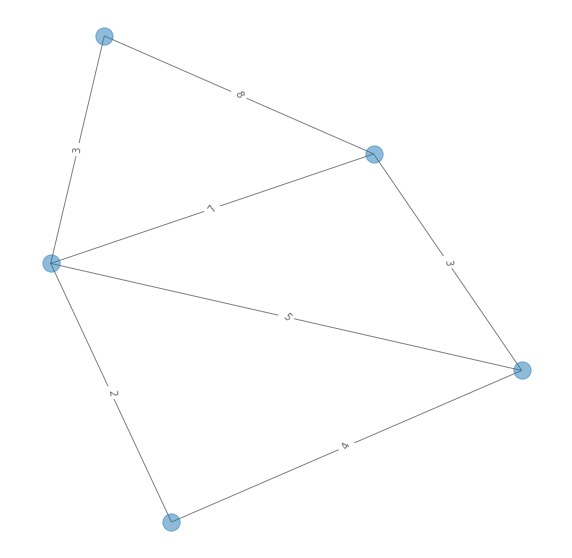

In [7]:
sample_graph = [[0, 4, 8], [0, 3, 7], [0, 1, 3], [4, 3, 3], [3, 1, 5], [3, 2, 2], [1, 2, 4]]
graphicResult(sample_graph)

#### D) Bellman-Ford Implementation (GeeksforGeeks-b, 2019) (Cormen et al. 2009)

In [8]:
# O(EV) function
def bellman_ford(self, source):
    '''
    A greedy/DP algorithm that finds shortest distance from source to all other nodes.
    Can be used on negative weights and can detect negative weight cycles.
    Uses relaxing of edges.
    '''
    
    # set distances to infinite so that they can be reset later
    V = self.v # get number of vertices in graph
    # reassign graph
    dist_lst = [infinity] * V
    # set first to 0. This is the source node.
    dist_lst[source] = 0
    
    # relax edges num of vertices - 1 times
    for i in range(V-1):
        
        # out of vertices left, update dist value and parent index 
        # of adjacent vertices to selected source
        for src, dest, wght in self.bellman_graph: 
            if dist_lst[src] != infinity and (dist_lst[src] + wght) < dist_lst[dest]: 
                dist_lst[dest] = dist_lst[src] + wght
                    
    # simply check for negative edge-weight cycles. If shorter path is found
    # than the one found above, there must be a cycle.
    # this is dangerous because it could infinitely decrease the cost of traversal between
    # nodes in the cycle.
    for src, dest, wght in self.bellman_graph:
        if dist_lst[src] != infinity and dist_lst[src] + wght < dist_lst[dest]:
            print("Negative edge-weight cycle. ABORTING!")
            return False
        
    return V, dist_lst, source
    
# assign bellman-ford to Graph class as method
Graph.bellman_ford = bellman_ford

In [9]:
# test bellman-ford
graph = Graph(5) 
graph.bellman_insert_path(0, 4, 8) 
graph.bellman_insert_path(0, 3, 7) 
graph.bellman_insert_path(0, 1, 3) 
graph.bellman_insert_path(4, 3, 3) 
graph.bellman_insert_path(3, 1, 5)
graph.bellman_insert_path(3, 2, 2) 
graph.bellman_insert_path(1, 2, 4) 
V, dist_lst, source = graph.bellman_ford(0)
printResult(V, dist_lst, source)

Source  -->  Destination  |  Shortest Distance 
-----------------------------------------------
   0    -->      0        |         0
-----------------------------------------------
   0    -->      1        |         3
-----------------------------------------------
   0    -->      2        |         7
-----------------------------------------------
   0    -->      3        |         7
-----------------------------------------------
   0    -->      4        |         8
-----------------------------------------------


We see that this output is the same as the output for Dijkstra's, a valid sign that both algorithms are finding the shortest paths as they should be.

#### E) Johnson's Implementation

In [10]:
def johnsons(self, v):
    '''
    A function that finds the minimum weight value,
    adds the absolute value of that minimum to all weights (including itself),
    and then runs
    '''
    
    # assign inital min_weight
    min_weight = 0
    
    for src, dest, wght in self.bellman_graph:
        # find smallest weight
        if min_weight > wght:
            min_weight = wght
            
    # add absolute value of weight to all other weights to run dijkstras
    total = abs(min_weight)
    for src, dest, wght in self.bellman_graph:
        # add total to each weight
        self.bellman_graph[dest][2] += total
        
    # convert bellman graph into dijkstra graph (this may add computational complexity)
    new_graph = Graph(v)
    for src, dest, wght in self.bellman_graph:
        new_graph.djikstra_insert_path(src, dest, wght)
    
    return new_graph

Graph.johnsons = johnsons

In [11]:
# test johnsons algorithm
num_vertex = 5
graph = Graph(num_vertex) 
graph.bellman_insert_path(0, 4, 8) 
graph.bellman_insert_path(0, 3, 7) 
graph.bellman_insert_path(0, 1, -1) 
graph.bellman_insert_path(4, 3, 3) 
graph.bellman_insert_path(3, 1, 2)
graph.bellman_insert_path(3, 2, 2) 
graph.bellman_insert_path(1, 2, 4) 
new_graph = graph.johnsons(num_vertex)

V, dist_lst, source = new_graph.dijkstras(0)
printResult(V, dist_lst, source)

Source  -->  Destination  |  Shortest Distance 
-----------------------------------------------
   0    -->      0        |         0
-----------------------------------------------
   0    -->      1        |         1
-----------------------------------------------
   0    -->      2        |         5
-----------------------------------------------
   0    -->      3        |         4
-----------------------------------------------
   0    -->      4        |         8
-----------------------------------------------


#### F) Computational Analysis

Create easy way to run all algorithms on repeat separately.



In [12]:
# create function that generates list of lists (each with length 3) 
# based upon number of edges and vertices
def generateList(v, e):
    '''
    input: 
        - v, the number of vertices
        - e, the number of edges (must be within the range v <= e <= 2v)
    a graph list must have the following properties:
        - equal to or less than 3 edges from each source
        - sources within the range of v
        - weights within the range of 0 to 10 (for simplicity)
    '''
    
    # list should look something like this:
    # graph_list = [[0,3,5], [0,2,9], [1,2,7]]
    
    # create list of lists
    graph_list = [[rd.randint(0,v-1) for i in range(3)] for _ in range(e)]
    
    return graph_list

In [13]:
def run_dijkstra(graph_list, v):
    
    # generate graphlist based upon e and v
    # set number of edges as equal to len of graph list
    e = len(graph_list)

    # generate graph and insert nodes
    graph = Graph(v)
    for node in graph_list:
        graph.djikstra_insert_path(node[0], node[1], node[2]) 
    
    return graph.dijkstras(0)

In [14]:
def run_bellman(graph_list, v):
    
    # generate graphlist based upon e and v
    # set number of edges as equal to len of graph list
    e = len(graph_list)
    
    # generate graph and insert nodes
    graph = Graph(v)
    for node in graph_list:
        graph.bellman_insert_path(node[0], node[1], node[2]) 
    
    return graph.bellman_ford(0)

In [15]:
def run_johnson(graph_list, v):
    # generate graphlist based upon e and v
    # set number of edges as equal to len of graph list
    e = len(graph_list)
    
    # generate graph and insert nodes
    graph = Graph(v)
    for node in graph_list:
        graph.bellman_insert_path(node[0], node[1], node[2]) 
    
    # run johnsons
    new_graph = graph.johnsons(num_vertex)
    
    return new_graph.dijkstras(0)

Now that we have a way of generating a list that can be used as an adjacency list for our graphs, as well as ways to test the computational speed of them, we can run an algorithm to compare speed.

100%|██████████| 397/397 [03:30<00:00,  1.89it/s]


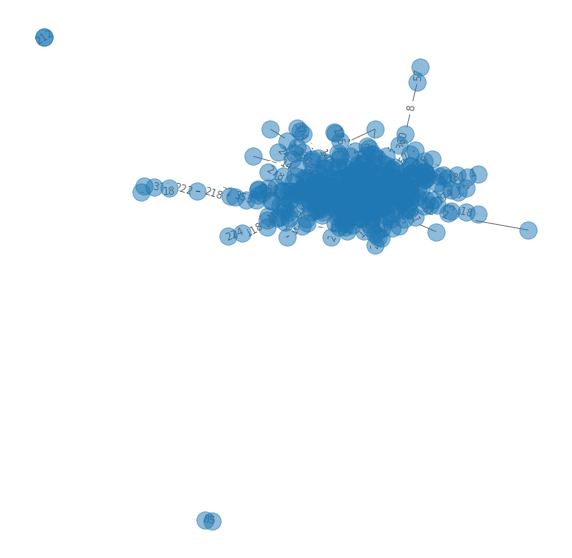

In [16]:
rd.seed(1)
# v is our independent variable
# speed is out dependent variable

vertex_list = range(3,400)

# we want to vary v and then take the average
dijkstra_avg_lst = []
bellman_avg_lst = []
johnson_avg_lst = []

for v in tqdm(vertex_list):
    # number of edges is somewhere between v and 2*v
    e = rd.randint(v, 2*v)
    
    # generate numbers to store average times
    dijkstra_time = 0
    bellman_time = 0
    johnson_time = 0
    
    # take average 50 times
    for _ in range(50):
        
        # generate list
        graph_list = generateList(v, e)
        
        # run on dijkstra's
        start = time.time()
        run_dijkstra(graph_list, v)
        result = time.time() - start
        dijkstra_time += result
        
        # run on bellman
        start = time.time()
        run_bellman(graph_list, v)
        result = time.time() - start
        bellman_time += result
        
        # run on johnson
        start = time.time()
        run_johnson(graph_list, v)
        result = time.time() - start
        johnson_time += result
        
    dijkstra_avg_lst.append(dijkstra_time / 50)
    bellman_avg_lst.append(bellman_time / 50)
    johnson_avg_lst.append(johnson_time / 50)
    
# example graph output
graphicResult(graph_list)

Text(0.5, 1.0, 'Time Taken To Find Shortest Paths from Origin to All Other Nodes')

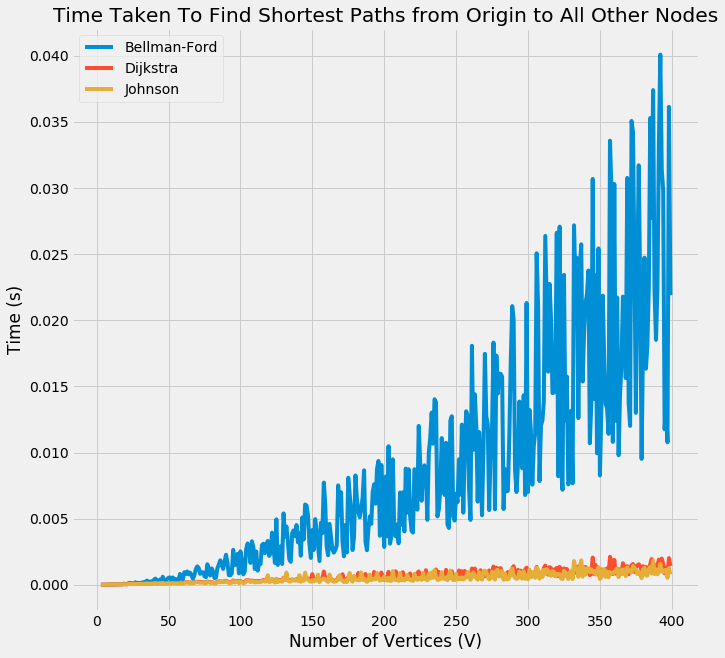

In [17]:
# plot computational analysis of 3 algorithms
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.plot(vertex_list, bellman_avg_lst, label='Bellman-Ford')
plt.plot(vertex_list, dijkstra_avg_lst, label='Dijkstra')
plt.plot(vertex_list, johnson_avg_lst, label='Johnson')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Time (s)")
plt.legend()
plt.title("Time Taken To Find Shortest Paths from Origin to All Other Nodes")